<a href="https://colab.research.google.com/github/didi-a-p/BootcampDataScienceAlura/blob/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/Projeto_M%C3%B3dulo_01_BootCamp_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados ANAC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [ ]:
pd.options.display.float_format = "{:.2f}".format


In [ ]:
dados_anac_teste = pd.read_csv('/content/DadosEstatsticos ANAC 2021.zip',
                               sep=";",
                              #  skiprows=3,
                              #  skipfooter=12, 
                               encoding="ISO-8859-1",
                               engine='python',
                               thousands='.',
                               decimal=',',
                               compression='zip'
                               )
dados_anac_teste

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,GRUPO DE VOO,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),ASK,RPK,ATK,RTK,COMBUSTÍVEL (LITROS),DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,3932.00,142.00,97876.00,0.00,73.00,52184500.00,32415400.00,8656200.00,3724860.00,nan,247320.00,30.00,806890000.00,0.00,601812.00,6330.00,1050000.00,409.08,nan
1,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,2338.00,131.00,48066.00,0.00,8034.00,47293800.00,18070400.00,3586260.00,2059920.00,nan,224141.00,29.00,371502000.00,0.00,62094800.00,6119.00,464000.00,418.10,nan
2,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,2892.00,127.00,194997.00,0.00,1980.00,46896000.00,22164300.00,7778960.00,3504400.00,nan,222256.00,29.00,1494460000.00,0.00,15174700.00,6119.00,1015000.00,411.50,nan
3,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBCF,CONFINS,MG,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,997.00,20.00,91022.00,493.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,3589.00,133.00,29865.00,6429.00,34344.00,43935900.00,30804200.00,7234210.00,3815040.00,nan,208227.00,31.00,811998000.00,46495100.00,230689000.00,6541.00,1077000.00,491.80,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900540,UPS,UPS - UNITED PARCEL SERVICE CO.,ESTRANGEIRA,2021,4,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SAEZ,"EZEIZA, BUENOS AIRES PROVINCE",NaN,NaN,ARGENTINA,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,0.00,0.00,338531.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
900541,UPS,UPS - UNITED PARCEL SERVICE CO.,ESTRANGEIRA,2021,4,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SCEL,SANTIAGO,NaN,NaN,CHILE,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,0.00,0.00,51366.00,0.00,0.00,0.00,0.00,2413240.00,1006320.00,0.00,43877.00,17.00,1006320000.00,0.00,0.00,0.00,935000.00,64.58,0.00
900542,UPS,UPS - UNITED PARCEL SERVICE CO.,ESTRANGEIRA,2021,4,SBKP,CAMPINAS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SKBO,BOGOTÁ,NaN,NaN,COLÔMBIA,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,0.00,0.00,395302.00,0.00,0.00,0.00,0.00,3977490.00,2818260.00,0.00,72318.00,17.00,2818280000.00,0.00,0.00,0.00,935000.00,94.70,0.00
900543,UPS,UPS - UNITED PARCEL SERVICE CO.,ESTRANGEIRA,2021,4,SCEL,SANTIAGO,NaN,NaN,CHILE,AMÉRICA DO SUL,SAEZ,"EZEIZA, BUENOS AIRES PROVINCE",NaN,NaN,ARGENTINA,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1064030.00,385239.00,0.00,19346.00,17.00,385248000.00,0.00,0.00,0.00,935000.00,31.02,0.00


Aqui, vamos substituir os valores nulos (NaN) pelo valor 'OUTRO' nas colunas 'AEROPORTO DE DESTINO (UF)', 'AEROPORTO DE DESTINO (REGIÃO), 'AEROPORTO DE ORIGEM (UF)' e 'AEROPORTO DE ORIGEM (REGIÃO)' para que esses dados não sejam descartados quando formos plotar os gráficos. Esses dados categorizados como 'OUTRO' nessas colunas quer dizer que esse tem como Internacional sua origem ou destino.

In [ ]:
dados_anac_teste['AEROPORTO DE DESTINO (UF)'].replace(np.nan, 'OUTRO', inplace=True)
dados_anac_teste['AEROPORTO DE DESTINO (REGIÃO)'].replace(np.nan, 'OUTRO', inplace=True)

dados_anac_teste['AEROPORTO DE ORIGEM (UF)'].replace(np.nan, 'OUTRO', inplace=True)
dados_anac_teste['AEROPORTO DE ORIGEM (REGIÃO)'].replace(np.nan, 'OUTRO', inplace=True)

In [ ]:
dados_anac_teste[dados_anac_teste['AEROPORTO DE ORIGEM (UF)'] == 'OUTRO']['NATUREZA'].value_counts(dropna=False)

INTERNACIONAL    126772
Name: NATUREZA, dtype: int64

Em seguida, observamos que as colunas **'AEROPORTO DE ORIGEM (REGIÃO)'** e **'AEROPORTO DE DESTINO (REGIÃO)'** possuem os valores **'NÃO IDENTIFICADO'** e **' '**, que não são interessantes de serem analizados, pela baixa ocorrencia e imprecisão da informação passada. Portanto vamos retira-los.

In [ ]:
dados_anac_teste['AEROPORTO DE ORIGEM (REGIÃO)'].value_counts()

SUDESTE             302252
NORDESTE            157846
NORTE               128349
OUTRO               126764
SUL                 100421
CENTRO-OESTE         84896
NÃO IDENTIFICADO         8
                         1
Name: AEROPORTO DE ORIGEM (REGIÃO), dtype: int64

In [ ]:
dados_anac_teste.drop(dados_anac_teste[dados_anac_teste['AEROPORTO DE DESTINO (REGIÃO)'] == 'NÃO IDENTIFICADO'].index, inplace=True)
dados_anac_teste.drop(dados_anac_teste[dados_anac_teste['AEROPORTO DE DESTINO (REGIÃO)'] == ' '].index, inplace=True)

dados_anac_teste.drop(dados_anac_teste[dados_anac_teste['AEROPORTO DE ORIGEM (REGIÃO)'] == 'NÃO IDENTIFICADO'].index, inplace=True)
dados_anac_teste.drop(dados_anac_teste[dados_anac_teste['AEROPORTO DE ORIGEM (REGIÃO)'] == ' '].index, inplace=True)

Agora vamos criar um DataFrame que mostre a frequência em que cada Unidade da Federação aparece no DataFrame, e a qual região ela pertence. Em seguida, iremos plotar um grafico de barras para analizarmos qual é a Unidade da Federação que mais aparece como origem de voos.

In [ ]:
origem_uf_regiao = dados_anac_teste[['AEROPORTO DE ORIGEM (UF)', 'AEROPORTO DE ORIGEM (REGIÃO)']].value_counts().reset_index('AEROPORTO DE ORIGEM (REGIÃO)')
origem_uf_regiao.head()

,AEROPORTO DE ORIGEM (REGIÃO),0
AEROPORTO DE ORIGEM (UF),,
SP,SUDESTE,174352
OUTRO,OUTRO,126764
RJ,SUDESTE,65312
MG,SUDESTE,52278
BA,NORDESTE,52109


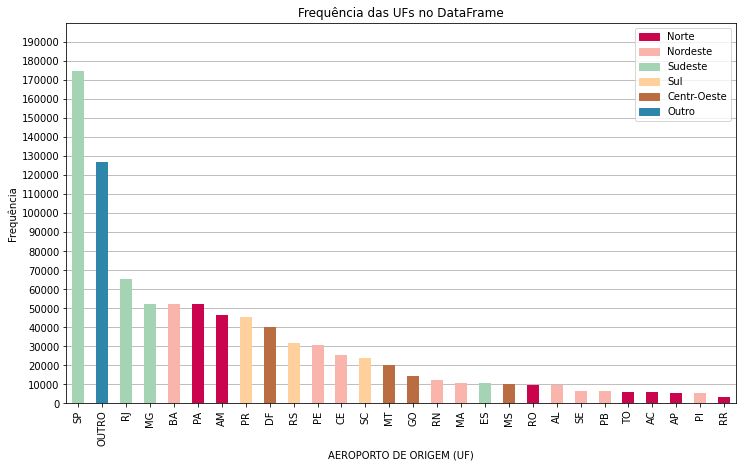

In [ ]:
colors = {'NORTE': '#CA054D', 'NORDESTE': '#F9B5AC', 'SUDESTE': '#A4D4B4', 'SUL':'#FFCF9C', 'CENTRO-OESTE': '#B96D40', 'OUTRO' : '#2E86AB'}

ax = origem_uf_regiao.plot(kind='bar',
                            zorder=2,
                            figsize=(12,7), 
                            color=[[colors[i] for i in origem_uf_regiao['AEROPORTO DE ORIGEM (REGIÃO)']]]
                            )

plt.ylim(0,200000)
plt.grid(b=True, which='major', axis='y', zorder=1)

NT = mpatches.Patch(color=colors['NORTE'], label='Norte')
ND = mpatches.Patch(color=colors['NORDESTE'], label='Nordeste')
SD = mpatches.Patch(color=colors['SUDESTE'], label='Sudeste')
SL = mpatches.Patch(color=colors['SUL'], label='Sul')
CO = mpatches.Patch(color=colors['CENTRO-OESTE'], label='Centr-Oeste')
OU = mpatches.Patch(color=colors['OUTRO'], label='Outro')
plt.legend(handles=[NT,ND,SD,SL,CO, OU], loc=1)

plt.yticks(np.arange(0, 200000, step=10000))
plt.ylabel('Frequência')
plt.title('Frequência das UFs no DataFrame')
plt.show()

Logo percebemos que o estado de São Paulo é de longe a origem que aparece com mais frequência do DataSet. Porém isso não significa necessáriamente que ele é a origem que recebe o maior numero de voos, já que a coluna 'DECOLAGENS' contém o número de vezes que esse voo foi feito no mês. Então vamos criar um DataFrame que contenha o valor total de decolagens por Unidade da Federação para podermos verificar qual é a origem de voos mais popular.

In [ ]:
decolagens_por_uf_origem = pd.crosstab([dados_anac_teste['AEROPORTO DE ORIGEM (UF)'], dados_anac_teste['AEROPORTO DE ORIGEM (REGIÃO)']],
                                        columns=dados_anac_teste['NATUREZA'],
                                        values = dados_anac_teste['DECOLAGENS'],
                                        aggfunc='sum',
                                        margins=True,
                                        margins_name='TOTAL DE DECOLAGENS'
                                        )

decolagens_por_uf_origem.reset_index('AEROPORTO DE ORIGEM (REGIÃO)',inplace=True)
decolagens_por_uf_origem = decolagens_por_uf_origem[['AEROPORTO DE ORIGEM (REGIÃO)', 'TOTAL DE DECOLAGENS']].iloc[:-1].sort_values('TOTAL DE DECOLAGENS', ascending=False)
decolagens_por_uf_origem.head()

NATUREZA,AEROPORTO DE ORIGEM (REGIÃO),TOTAL DE DECOLAGENS
AEROPORTO DE ORIGEM (UF),,
SP,SUDESTE,5042785.00
RJ,SUDESTE,1949234.00
DF,CENTRO-OESTE,1285705.00
OUTRO,OUTRO,1246003.00
MG,SUDESTE,1227556.00


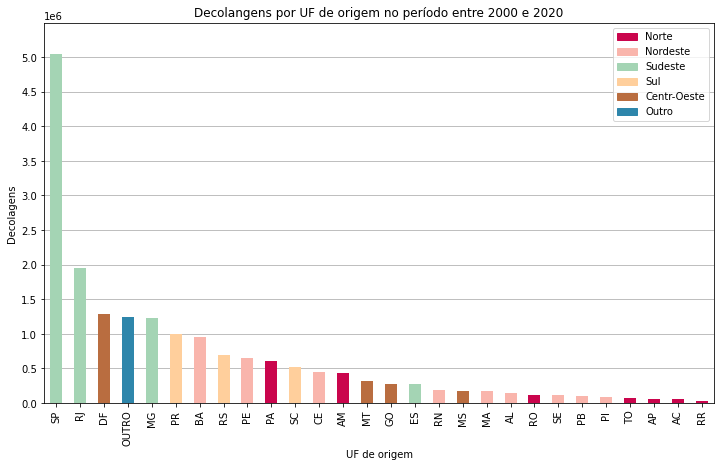

In [ ]:
ax = decolagens_por_uf_origem.plot(kind='bar',
                            zorder=2,
                            figsize=(12,7), 
                            color=[[colors[i] for i in decolagens_por_uf_origem['AEROPORTO DE ORIGEM (REGIÃO)']]]
                            )

plt.ylim(0,5500000)
plt.grid(b=True, which='major', axis='y', zorder=1)

NT = mpatches.Patch(color=colors['NORTE'], label='Norte')
ND = mpatches.Patch(color=colors['NORDESTE'], label='Nordeste')
SD = mpatches.Patch(color=colors['SUDESTE'], label='Sudeste')
SL = mpatches.Patch(color=colors['SUL'], label='Sul')
CO = mpatches.Patch(color=colors['CENTRO-OESTE'], label='Centr-Oeste')
OU = mpatches.Patch(color=colors['OUTRO'], label='Outro')
plt.legend(handles=[NT,ND,SD,SL,CO, OU], loc=1)

plt.yticks(np.arange(0, 5500000, step=500000))
plt.ylabel('Decolagens')
plt.xlabel('UF de origem')
plt.title('Decolangens por UF de origem no período entre 2000 e 2020')
plt.show()

Ao plotar o gráfico, logo percebemos que a categoria 'Outro' (Internacional), que aparecia com segunda maior frequência, não é tão popular assim, já que o Rio de Janeiro e o Distrito Federal possuem mais voos no total. Já o estado de São Paulo se mantém como mais popular em número total de voos por uma margem muito grande.

---


Mas será que isso basta para dizer que São Paulo é a origem mais popular?


Vamos analizar a coluna 'PASSAGEIROS PAGOS' para descobrir isso.

In [ ]:
passageiros_por_uf_origem = pd.crosstab([dados_anac_teste['AEROPORTO DE ORIGEM (UF)'],dados_anac_teste['AEROPORTO DE ORIGEM (REGIÃO)']],
                                         columns=dados_anac_teste['NATUREZA'],
                                         values = dados_anac_teste['PASSAGEIROS PAGOS'],
                                         aggfunc='sum',
                                         margins=True,
                                         margins_name='TOTAL DE PASSAGEIROS PAGOS')
passageiros_por_uf_origem.reset_index('AEROPORTO DE ORIGEM (REGIÃO)',inplace=True)

In [ ]:
passageiros_por_uf_origem = passageiros_por_uf_origem[['AEROPORTO DE ORIGEM (REGIÃO)', 'TOTAL DE PASSAGEIROS PAGOS']].iloc[:-1].sort_values('TOTAL DE PASSAGEIROS PAGOS', ascending=False)
passageiros_por_uf_origem.head()

NATUREZA,AEROPORTO DE ORIGEM (REGIÃO),TOTAL DE PASSAGEIROS PAGOS
AEROPORTO DE ORIGEM (UF),,
SP,SUDESTE,490206974.00
RJ,SUDESTE,186894465.00
OUTRO,OUTRO,160642726.00
DF,CENTRO-OESTE,127644375.00
MG,SUDESTE,87167882.00


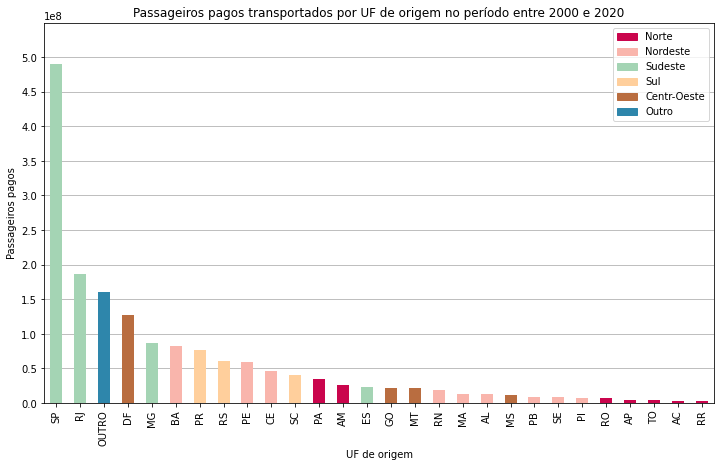

In [ ]:
ax = passageiros_por_uf_origem.plot(kind='bar',
                            zorder=2,
                            figsize=(12,7), 
                            color=[[colors[i] for i in passageiros_por_uf_origem['AEROPORTO DE ORIGEM (REGIÃO)']]]
                            )

plt.ylim(0,550000000)
plt.grid(b=True, which='major', axis='y', zorder=1)

NT = mpatches.Patch(color=colors['NORTE'], label='Norte')
ND = mpatches.Patch(color=colors['NORDESTE'], label='Nordeste')
SD = mpatches.Patch(color=colors['SUDESTE'], label='Sudeste')
SL = mpatches.Patch(color=colors['SUL'], label='Sul')
CO = mpatches.Patch(color=colors['CENTRO-OESTE'], label='Centr-Oeste')
OU = mpatches.Patch(color=colors['OUTRO'], label='Outro')
plt.legend(handles=[NT,ND,SD,SL,CO, OU], loc=1)

plt.yticks(np.arange(0, 550000000, step=50000000))
plt.ylabel('Passageiros pagos')
plt.xlabel('UF de origem')
plt.title('Passageiros pagos transportados por UF de origem no período entre 2000 e 2020')
plt.show()

Enfim, concluimos que o estado de São Paulo realmente é, de longe, a origem de voos mais popular. O Rio de Janeiro se mantém em segundo, e a categoria 'OUTRO', apesar de ter menos voos que o Distrito Federal, transporta mais passageiros no total.

 Uma ipótese do porque disso acontecer pode ser o tamanho dos aviões que fazem voos internacionais, que por serem maiores, podem transportar mais passageiros.

## São Paulo como Origem

Agora que temos certeza de que o estado de São Paulo é o mais popular em origem de voos, vamos analizar os destinos mais populares saindo do estado de São Paulo.

Vamos criar um DataFrame que contem apenas voos saindo do estado de São Paulo e que o destino seja algum outro estado.

In [ ]:
voos_sp_nsp = dados_anac_teste[(dados_anac_teste['AEROPORTO DE ORIGEM (UF)'] == 'SP') & (dados_anac_teste['AEROPORTO DE DESTINO (UF)'] != 'SP')]

In [ ]:
voos_sp_nsp.reset_index(drop=True, inplace=True)

In [ ]:
voos_sp_nsp.head()

,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,GRUPO DE VOO,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),CORREIO (KG),ASK,RPK,ATK,RTK,COMBUSTÍVEL (LITROS),DISTÂNCIA VOADA (KM),DECOLAGENS,CARGA PAGA KM,CARGA GRATIS KM,CORREIO KM,ASSENTOS,PAYLOAD,HORAS VOADAS,BAGAGEM (KG)
0,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,KDFW,"DALLAS & FORT WORTH, TEXAS",OUTRO,OUTRO,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,INTERNACIONAL,REGULAR,5016.00,161.00,172379.00,0.00,18.00,53924000.00,41351900.00,8944740.00,5142900.00,nan,255564.00,31.00,1421090000.00,0.00,148392.00,6541.00,1085000.00,456.84,nan
1,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,KJFK,"NEW YORK, NEW YORK",OUTRO,OUTRO,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,INTERNACIONAL,REGULAR,3699.00,202.00,304809.00,0.00,11051.00,46896000.00,28349100.00,7778960.00,4972160.00,nan,222256.00,29.00,2336060000.00,0.00,84694900.00,6119.00,1015000.00,422.04,nan
2,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,KMIA,"MIAMI, FLORIDA",OUTRO,OUTRO,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,INTERNACIONAL,REGULAR,14835.00,594.00,799846.00,0.00,6037.00,165067000.00,107643000.00,27380700.00,15925600.00,nan,782306.00,119.00,6187170000.00,0.00,50646100.00,25109.00,4165000.00,1862.36,nan
3,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SGAS,ASUNCIÓN,OUTRO,OUTRO,PARAGUAI,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,1442.00,38.00,48076.00,0.00,667.00,7437120.00,2292190.00,951669.00,306930.00,nan,35247.00,31.00,90219800.00,0.00,10427400.00,6541.00,837000.00,725.03,nan
4,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,SUMU,"MONTEVIDEO, MONTEVIDEO",OUTRO,OUTRO,URUGUAI,AMÉRICA DO SUL,INTERNACIONAL,REGULAR,1593.00,86.00,63913.00,0.00,2107.00,10269400.00,3611000.00,1695600.00,504849.00,nan,48670.00,31.00,156022000.00,0.00,23853000.00,6541.00,1080000.00,707.98,nan


Em seguida vamos criar uma coluna que contenha o ano e o mês, para facilitar a visualização.

In [ ]:
meses = {1 : 'Jan', 2 : 'Fev', 3 : 'Mar', 4 : 'Abr', 5 : 'Mai', 6 : 'Jun', 7 : 'Jul', 8 : 'Ago', 9 : 'Set', 10 : 'Out', 11 : 'Nov', 12 : 'Dez'}

In [ ]:
novas_datas = []
novo_mes = voos_sp_nsp['MÊS'].replace(meses)
for i in range(len(voos_sp_nsp.index)):

  novas_datas.append(str(voos_sp_nsp['ANO'][i]) + '/' + novo_mes[i])

# novas_datas

In [ ]:
voos_sp_nsp['ANO/MÊS'] = novas_datas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
voos_sp_nsp['ANO/MÊS']

0         2000/Jan
1         2000/Jan
2         2000/Jan
3         2000/Jan
4         2000/Jan
            ...   
143430    2021/Mar
143431    2021/Abr
143432    2021/Abr
143433    2021/Abr
143434    2021/Abr
Name: ANO/MÊS, Length: 143435, dtype: object

Agora vamos criar um DataFrame que contem o número de passageiros de voos saindo do estado de São Paulo com destino para cada uma das Unidades da Federação por mês.

In [ ]:
passageiros_sp_uf = pd.crosstab(columns=voos_sp_nsp['ANO/MÊS'],
                                index=voos_sp_nsp['AEROPORTO DE DESTINO (UF)'],
                                values=voos_sp_nsp['PASSAGEIROS PAGOS'],
                                aggfunc='sum',
                                margins=True,
                                margins_name='Total'
                                )
passageiros_sp_uf

ANO/MÊS,2000/Abr,2000/Ago,2000/Dez,2000/Fev,2000/Jan,2000/Jul,2000/Jun,2000/Mai,2000/Mar,2000/Nov,2000/Out,2000/Set,2001/Abr,2001/Ago,2001/Dez,2001/Fev,2001/Jan,2001/Jul,2001/Jun,2001/Mai,2001/Mar,2001/Nov,2001/Out,2001/Set,2002/Abr,2002/Ago,2002/Dez,2002/Fev,2002/Jan,2002/Jul,2002/Jun,2002/Mai,2002/Mar,2002/Nov,2002/Out,2002/Set,2003/Abr,2003/Ago,2003/Dez,2003/Fev,...,2018/Ago,2018/Dez,2018/Fev,2018/Jan,2018/Jul,2018/Jun,2018/Mai,2018/Mar,2018/Nov,2018/Out,2018/Set,2019/Abr,2019/Ago,2019/Dez,2019/Fev,2019/Jan,2019/Jul,2019/Jun,2019/Mai,2019/Mar,2019/Nov,2019/Out,2019/Set,2020/Abr,2020/Ago,2020/Dez,2020/Fev,2020/Jan,2020/Jul,2020/Jun,2020/Mai,2020/Mar,2020/Nov,2020/Out,2020/Set,2021/Abr,2021/Fev,2021/Jan,2021/Mar,Total
AEROPORTO DE DESTINO (UF),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,239.00,492.00,555.00,1320.00,1087.00,414.00,220.00,237.00,501.00,469.00,453.00,448.00,474.00,629.00,592.00,616.00,711.00,831.00,661.00,472.00,481.00,598.00,512.00,257.00,412.00,479.00,396.00,606.00,565.00,594.00,526.00,516.00,444.00,349.00,330.00,452.00,210.00,432.00,640.00,378.00,...,nan,654.00,324.00,402.00,nan,nan,nan,215.00,nan,nan,0.00,3975.00,3254.00,3721.00,2131.00,1634.00,2889.00,2697.00,3094.00,1388.00,3228.00,2998.00,3142.00,168.00,608.00,4385.00,3861.00,3806.00,nan,nan,nan,3232.00,3326.00,2674.00,1989.00,3905.00,3417.00,4382.00,2519.00,147281.00
AL,6473.00,4726.00,10143.00,6697.00,10158.00,9843.00,5375.00,4589.00,7118.00,5840.00,6692.00,5493.00,5986.00,5334.00,9105.00,6573.00,10266.00,9493.00,6747.00,4913.00,7093.00,5281.00,5499.00,4966.00,4142.00,4490.00,7476.00,4634.00,7972.00,8331.00,5150.00,4448.00,4924.00,5605.00,5611.00,5153.00,4520.00,5695.00,10020.00,3837.00,...,47451.00,62645.00,41746.00,62871.00,58748.00,46561.00,44473.00,44110.00,48745.00,50479.00,49577.00,45062.00,46565.00,61929.00,45719.00,66300.00,58956.00,39688.00,38183.00,52336.00,45545.00,48092.00,45646.00,4711.00,11394.00,50362.00,51483.00,73905.00,9584.00,5797.00,3570.00,32967.00,41878.00,27528.00,18913.00,21114.00,37011.00,49571.00,26940.00,6164052.00
AM,9813.00,10161.00,9675.00,10551.00,11990.00,12055.00,9143.00,9022.00,10465.00,10509.00,10807.00,9236.00,8937.00,11325.00,10727.00,10062.00,12056.00,12619.00,9948.00,8761.00,9676.00,11124.00,10390.00,10614.00,8831.00,11519.00,8786.00,10679.00,12945.00,12832.00,10635.00,8897.00,9793.00,10097.00,9803.00,10883.00,9126.00,10012.00,9543.00,10537.00,...,28550.00,29516.00,27378.00,33483.00,28910.00,23279.00,24684.00,27904.00,29820.00,32443.00,31170.00,32480.00,37285.00,41054.00,27879.00,33929.00,41277.00,31450.00,31240.00,28892.00,41372.00,43298.00,37507.00,5573.00,24725.00,36758.00,38876.00,45112.00,19207.00,12446.00,6476.00,28814.00,35006.00,32620.00,30449.00,20244.00,23856.00,39074.00,23109.00,5357617.00
AP,401.00,383.00,563.00,401.00,563.00,438.00,425.00,385.00,268.00,583.00,406.00,341.00,340.00,480.00,683.00,405.00,428.00,672.00,678.00,346.00,358.00,650.00,503.00,476.00,441.00,629.00,698.00,467.00,697.00,702.00,869.00,519.00,396.00,510.00,378.00,531.00,406.00,451.00,443.00,311.00,...,550.00,539.00,306.00,446.00,472.00,448.00,630.00,431.00,717.00,501.00,479.00,406.00,391.00,680.00,415.00,569.00,512.00,335.00,315.00,432.00,678.00,577.00,455.00,nan,1502.00,659.00,426.00,628.00,998.00,862.00,543.00,249.00,0.00,nan,154.00,272.00,976.00,838.00,738.00,127904.00
BA,49542.00,49780.00,78774.00,46427.00,65760.00,70152.00,48219.00,43065.00,52635.00,59660.00,63921.00,55193.00,55816.00,57932.00,75762.00,63849.00,72659.00,81064.00,57836.00,45822.00,53676.00,59033.00,65857.00,62796.00,50341.00,48591.00,72292.00,56491.00,73204.00,73695.00,57181.00,52952.00,53355.00,53678.00,59157.00,51148.00,56986.00,48024.00,77451.00,52676.00,...,158670.00,237086.00,164310.00,230724.00,209103.00,170579.00,151193.00,172610.00,184446.00,183239.00,175321.00,165469.00,182430.00,261653.00,175568.00,230800.00,215292.00,164952.00,140854.00,183002.00,199139.00,204456.00,197364.00,12647.00,47272.00,185465.00,218298.00,

Vamos ordenar os valores de acordo com o valor da coluna 'Total' e deleta-la em seguida, para que ela não interfira na comparação entre as UFs.

---

Em seguida, vamos arrumar as colunas do DataFrame, que representam o ano e o mês de referência, em ordem crescente.

In [ ]:
passageiros_sp_uf.sort_values('Total', ascending=False, inplace=True)
passageiros_sp_uf.drop('Total', axis=1, inplace=True)

In [ ]:
# corrigindo a ordem das colunas
data_ordem = ['2000/Jan', '2000/Fev', '2000/Mar', '2000/Abr', '2000/Mai', '2000/Jun', '2000/Jul', '2000/Ago', '2000/Set', '2000/Out', '2000/Nov', '2000/Dez',
              '2001/Jan', '2001/Fev', '2001/Mar', '2001/Abr', '2001/Mai', '2001/Jun', '2001/Jul', '2001/Ago', '2001/Set', '2001/Out', '2001/Nov', '2001/Dez',
              '2002/Jan', '2002/Fev', '2002/Mar', '2002/Abr', '2002/Mai', '2002/Jun', '2002/Jul', '2002/Ago', '2002/Set', '2002/Out', '2002/Nov', '2002/Dez',
              '2003/Jan', '2003/Fev', '2003/Mar', '2003/Abr', '2003/Mai', '2003/Jun', '2003/Jul', '2003/Ago', '2003/Set', '2003/Out', '2003/Nov', '2003/Dez',
              '2004/Jan', '2004/Fev', '2004/Mar', '2004/Abr', '2004/Mai', '2004/Jun', '2004/Jul', '2004/Ago', '2004/Set', '2004/Out', '2004/Nov', '2004/Dez',
              '2005/Jan', '2005/Fev', '2005/Mar', '2005/Abr', '2005/Mai', '2005/Jun', '2005/Jul', '2005/Ago', '2005/Set', '2005/Out', '2005/Nov', '2005/Dez',
              '2006/Jan', '2006/Fev', '2006/Mar', '2006/Abr', '2006/Mai', '2006/Jun', '2006/Jul', '2006/Ago', '2006/Set', '2006/Out', '2006/Nov', '2006/Dez',
              '2007/Jan', '2007/Fev', '2007/Mar', '2007/Abr', '2007/Mai', '2007/Jun', '2007/Jul', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez',
              '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul', '2008/Ago', '2008/Set', '2008/Out', '2008/Nov', '2008/Dez',
              '2009/Jan', '2009/Fev', '2009/Mar', '2009/Abr', '2009/Mai', '2009/Jun', '2009/Jul', '2009/Ago', '2009/Set', '2009/Out', '2009/Nov', '2009/Dez',
              '2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr', '2010/Mai', '2010/Jun', '2010/Jul', '2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez',
              '2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun', '2011/Jul', '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez',
              '2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez',
              '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez',
              '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez',
              '2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun', '2015/Jul', '2015/Ago', '2015/Set', '2015/Out', '2015/Nov', '2015/Dez',
              '2016/Jan', '2016/Fev', '2016/Mar', '2016/Abr', '2016/Mai', '2016/Jun', '2016/Jul', '2016/Ago', '2016/Set', '2016/Out', '2016/Nov', '2016/Dez',
              '2017/Jan', '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/Jun', '2017/Jul', '2017/Ago', '2017/Set', '2017/Out', '2017/Nov', '2017/Dez',
              '2018/Jan', '2018/Fev', '2018/Mar', '2018/Abr', '2018/Mai', '2018/Jun', '2018/Jul', '2018/Ago', '2018/Set', '2018/Out', '2018/Nov', '2018/Dez',
              '2019/Jan', '2019/Fev', '2019/Mar', '2019/Abr', '2019/Mai', '2019/Jun', '2019/Jul', '2019/Ago', '2019/Set', '2019/Out', '2019/Nov', '2019/Dez',
              '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
              '2021/Jan', '2021/Fev', '2021/Mar'
              ]

In [ ]:
passageiros_sp_uf = passageiros_sp_uf[data_ordem]

Agora vamos plotar a série histórica dos quatro destinos mais populares partindo do estado de São Paulo para termos uma idéia de como elá parece.

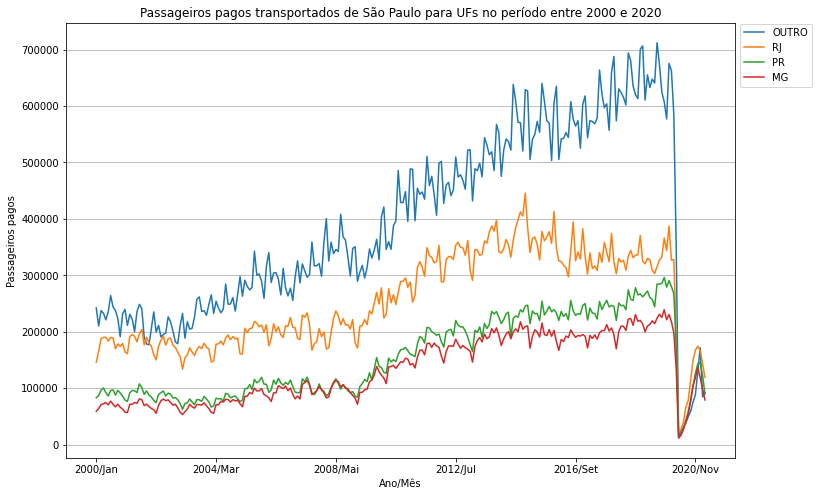

In [ ]:
ax = passageiros_sp_uf[1:].head(4).T.plot(figsize=(12,8), zorder=2)
plt.legend(bbox_to_anchor=(1, 1.01))

plt.grid(b=True, which='major', axis='y', zorder=1)


plt.ylabel('Passageiros pagos')
plt.xlabel('Ano/Mês')
plt.title('Passageiros pagos transportados de São Paulo para UFs no período entre 2000 e 2020')
plt.show()

Percebemos uma clara tendência de crescimento ao longo dos anos, até que no final, há uma queda brusca, onde os valores de todos os quatro destinos mais populares são os mais baixos de toda a série histórica.

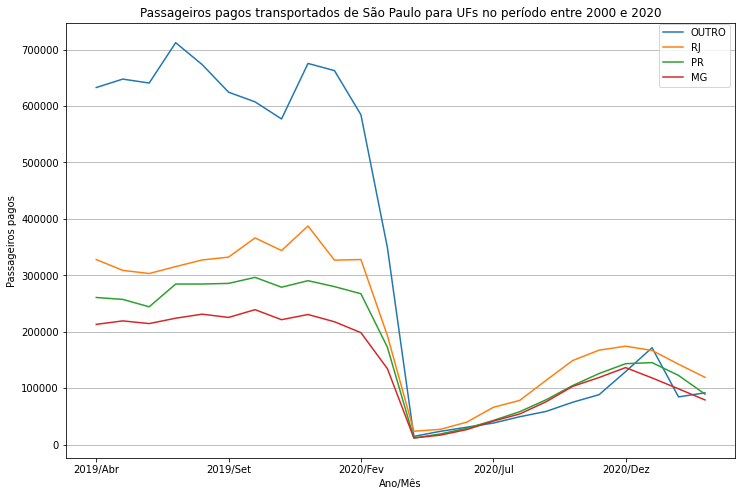

In [ ]:
ax = passageiros_sp_uf[1:].head(4).T[-24:].plot(figsize=(12,8), zorder=2)
plt.legend(bbox_to_anchor=(1, 1.01))

plt.grid(b=True, which='major', axis='y', zorder=1)


plt.ylabel('Passageiros pagos')
plt.xlabel('Ano/Mês')
plt.title('Passageiros pagos transportados de São Paulo para UFs no período entre 2000 e 2020')
plt.show()

Ao analizarmos focando nesse período de queda brusca, percebemos que ele coincide com o início da propagação da pandemia de covid-19.